In [22]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score

In [23]:
# Read the data
data = pd.read_csv('Amazon_DataSet.csv')

In [24]:
# change Sentiment column to 0 and 1
data['Sentiment'] = data['Sentiment'].replace(['Negative'], 0)
data['Sentiment'] = data['Sentiment'].replace(['Positive'], 1)

In [25]:
# split the data into train and test
train, test = train_test_split(data, test_size=0.2,random_state=None)
X_train  =  train['reviewText']
Y_train = train['Sentiment']
X_test = test['reviewText']
Y_test = test['Sentiment']




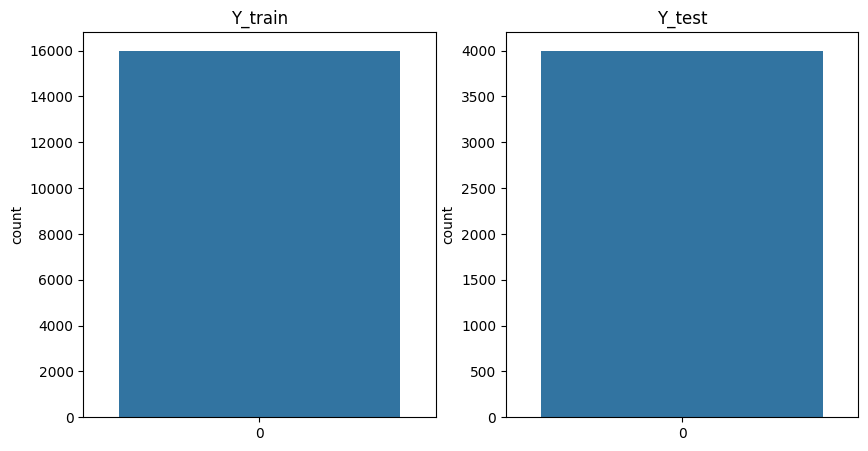

C:\Users\ASUS\AppData\Local\Temp\ipykernel_13612\2990360705.py:23: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train.apply(lambda x: len(x.split())))
C:\Users\ASUS\AppData\Local\Temp\ipykernel_13612\2990360705.py:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_test.apply(lambda x: len(x.

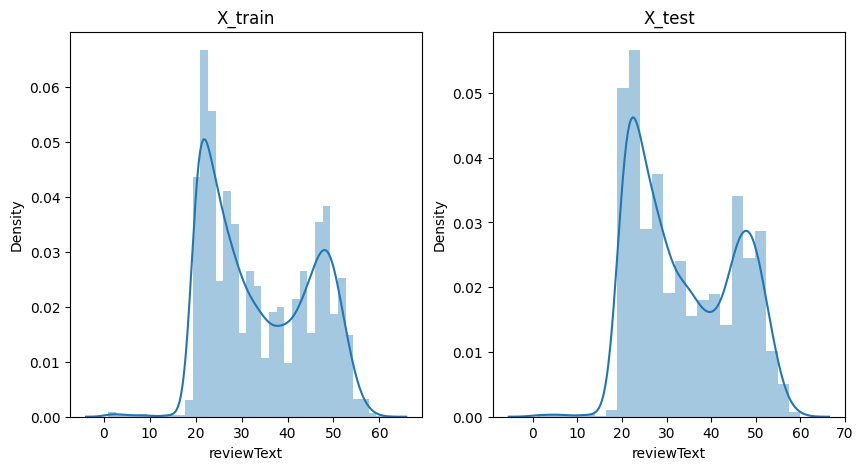

In [26]:
#sort X_train and Y_train efficiently
X_train = X_train.reset_index(drop=True)
Y_train = Y_train.reset_index(drop=True)

#sort X_test and Y_test efficiently
X_test = X_test.reset_index(drop=True)
Y_test = Y_test.reset_index(drop=True)

# usa plot to see the distribution of Y_train and Y_test
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(Y_train)
plt.title('Y_train')
plt.subplot(1,2,2)
sns.countplot(Y_test)
plt.title('Y_test')
plt.show()


# plot the distribution of X_train and X_test
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.distplot(X_train.apply(lambda x: len(x.split())))
plt.title('X_train')
plt.subplot(1,2,2)
sns.distplot(X_test.apply(lambda x: len(x.split())))
plt.title('X_test')
plt.show()









In [27]:
# tokanization and remove stop words
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
def remove_stop_words(text):
    word_tokens = word_tokenize(text)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    return " ".join(filtered_sentence)

def stemming(text):
    ps = PorterStemmer()
    word_tokens = word_tokenize(text)
    filtered_sentence = [ps.stem(w) for w in word_tokens]
    return " ".join(filtered_sentence)

# apply tokanization and remove stop words
X_train = X_train.apply(remove_stop_words)
X_test = X_test.apply(remove_stop_words)

# apply stemming
X_train = X_train.apply(stemming)
X_test = X_test.apply(stemming)


# countvectorizer to convert text to vector and ngram_range to convert word to vector
vectorizer = CountVectorizer(ngram_range=(1, 2))
vectorizer.fit(X_train)
X_train = vectorizer.transform(X_train)
X_test  = vectorizer.transform(X_test)






[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [28]:
# build the model
from sklearn.linear_model import LogisticRegression

# fit the model
model = LogisticRegression()
model.fit(X_train, Y_train)

# predict the model
Y_pred = model.predict(X_test)

# calculate the accuracy

print("Accuracy: ", accuracy_score(Y_test, Y_pred))


Accuracy:  0.90175


c:\Users\ASUS\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
